In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
%matplotlib inline

# Gemeindedaten Einbürgerungen

In [3]:
df = pd.read_excel('Total.xlsx')

In [4]:
#Kantone
df_kant = df[df['Geografische Einheit'].str.contains('^- ')]

In [5]:
#Bezirke
df_bez = df[df['Geografische Einheit'].str.contains('>> ')]

In [6]:
#Gemeinden
df_gem = df[df['Geografische Einheit'].str.contains('\.\.\.\.\.\.')]

In [7]:
df_gem['GMDNR'] = df_gem['Geografische Einheit'].str.extract('(\d{4})').astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_gem['Gemeindename'] = df_gem['Geografische Einheit'].str.extract('\d{4} (.*)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_gem[df_gem['GMDNR'] == 1]

,Jahr,Geografische Einheit,Kategorie,Einbürgerungen,GMDNR,Gemeindename
3,2011,......0001 Aeugst am Albis,Geschlecht - Total,15,1,Aeugst am Albis
2503,2012,......0001 Aeugst am Albis,Geschlecht - Total,6,1,Aeugst am Albis
5003,2013,......0001 Aeugst am Albis,Geschlecht - Total,11,1,Aeugst am Albis
7503,2014,......0001 Aeugst am Albis,Geschlecht - Total,8,1,Aeugst am Albis
10003,2015,......0001 Aeugst am Albis,Geschlecht - Total,10,1,Aeugst am Albis


In [10]:
#We will use this later (or not)
df_namenindex = df_gem[df_gem['Jahr'] == 2015][['GMDNR', 'Gemeindename']]

In [11]:
df_gem2 = df_gem.pivot(index='GMDNR', columns='Jahr', values='Einbürgerungen')

In [12]:
df_gem2 = df_gem2.reset_index()

In [13]:
df_gem2['Total_Einbürgerungen'] = df_gem2[[2011, 2012, 2013, 2014, 2015]].sum(axis=1)

# Bevölkerung

In [27]:
colnames = ['Geografische Einheit', 'Bevölkerungsstand 1. Jan', 'Lebendgeburten', 'Todesfälle', 'Geburtenüberschuss', 'Zuzüge', 'Wegzüge', 'Wanderungssaldo', 'Bereinigungen', 'Bevölkerungsstand 31. Dez', 'Veränderung absolut', 'Veränderung relativ']

In [32]:
df_bev = pd.read_excel('Einwohnerzahlen.xls', sheetname='2015', skiprows=5, names=colnames)

In [33]:
df_bev['Geografische Einheit'].fillna('NONE', inplace=True)

In [35]:
#Gemeinden
df_bev_gem = df_bev[df_bev['Geografische Einheit'].str.contains('\.\.\.\.\.\.')]

In [36]:
df_bev_gem['Gemeindename'] = df_bev_gem['Geografische Einheit'].str.extract('\d{4} (.*)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_bev_gem['GMDNR'] = df_bev_gem['Geografische Einheit'].str.extract('(\d{4})').astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_bev_gem = df_bev_gem[['GMDNR', 'Gemeindename', 'Bevölkerungsstand 1. Jan']]

In [39]:
df_bev_gem.head(2)

,GMDNR,Gemeindename,Bevölkerungsstand 1. Jan
3,1,Aeugst am Albis,1959.0
4,2,Affoltern am Albis,11552.0


In [41]:
df_bev_gem.shape

(2324, 3)

# Merge Bevdata to Einb-Data

In [40]:
df_gem2.merge(df_bev_gem, how='left', left_on='GMDNR', right_on='GMDNR').shape

(2324, 9)

In [42]:
df_gem2.merge(df_bev_gem, how='inner', left_on='GMDNR', right_on='GMDNR').shape

(2324, 9)

In [43]:
df_gem3 = df_gem2.merge(df_bev_gem, how='inner', left_on='GMDNR', right_on='GMDNR')

In [44]:
df_gem3['Bevölkerungsstand 1. Jan'].isnull().any()

False

In [45]:
df_gem3['Einbürgerungsquote'] = df_gem3['Total_Einbürgerungen'] / df_gem3['Bevölkerungsstand 1. Jan'] * 100

In [60]:
df_gem3.head(2)

,GMDNR,2011,2012,2013,2014,2015,Total_Einbürgerungen,Gemeindename,Bevölkerungsstand 1. Jan,Einbürgerungsquote
0,1,15,6,11,8,10,50,Aeugst am Albis,1959.0,2.552323
1,2,49,55,83,49,55,291,Affoltern am Albis,11552.0,2.519044


# Import the Geodata

In [46]:
gdf = gpd.read_file('shp/g1g17.shp')

In [47]:
gdf.head(2)

,AREA_HA,BZNR,E_CNTR,E_MAX,E_MIN,GMDNAME,GMDNR,GRNR,KTNR,N_CNTR,...,X_MIN,Y_CNTR,Y_MAX,Y_MIN,Z_AVG,Z_CNTR,Z_MAX,Z_MED,Z_MIN,geometry
0,791,101,2679300,2681154,2678110,Aeugst am Albis,1,4,1,1235700,...,678110,235700,238544,234561,684,699,886,673,532,"POLYGON ((680805.2512499988 237763.620000001, ..."
1,754,101,2675100,2676118,2672793,Obfelden,10,4,1,1235300,...,672793,235300,237091,232987,439,452,520,439,383,"POLYGON ((676118.2525000013 235522.7037499994,..."


In [48]:
gdf.shape

(2258, 24)

In [49]:
gdf.crs

{'ellps': 'bessel',
 'k_0': 1,
 'lat_0': 46.95240555555556,
 'lon_0': 7.439583333333333,
 'no_defs': True,
 'proj': 'somerc',
 'units': 'm',
 'x_0': 600000,
 'y_0': 200000}

In [50]:
#gdf = gdf.to_crs(epsg=4326)

# Merge Geodata

With Einbürgerungen

In [51]:
#Here are the shapefiles without population data
gdf_outerleft = gdf.merge(df_gem3, how='left', left_on='GMDNR', right_on='GMDNR')
gdf_outerleft[gdf_outerleft['Total_Einbürgerungen'].isnull()]

,AREA_HA,BZNR,E_CNTR,E_MAX,E_MIN,GMDNAME,GMDNR,GRNR,KTNR,N_CNTR,...,geometry,2011,2012,2013,2014,2015,Total_Einbürgerungen,Gemeindename,Bevölkerungsstand 1. Jan,Einbürgerungsquote
243,2579,1001,2567600,2570776,2564794,Belmont-Broye,2053,2,10,1190700,...,"POLYGON ((570385.6887499988 189341.6737499982,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,4013,1001,2555000,2561257,2547264,Estavayer,2054,2,10,1188900,...,(POLYGON ((549140.9800000004 178013.7612500004...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,974,1001,2550300,2553446,2546837,Cheyres-Châbles,2055,2,10,1185000,...,"POLYGON ((552920.0100000016 186921.28125, 5528...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,3606,1004,2571500,2575262,2566768,Gibloux,2236,2,10,1174500,...,"POLYGON ((575019.3012499996 176316.5012499988,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,1751,1005,2575000,2578092,2569683,Mont-Vully,2284,2,10,1200900,...,"POLYGON ((578092.3087499999 202980.7725000009,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,257,1005,2579500,2581225,2579035,Staatswald Galm,2391,2,10,1196000,...,"POLYGON ((581225.098749999 196897.5812500007, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,3291,108,2694200,2700727,2692986,Illnau-Effretikon,296,4,1,1253700,...,"POLYGON ((699740.6499999985 257519.098749999, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,32377,1841,2765500,2776203,2757535,Surses,3543,5,18,1162700,...,"POLYGON ((769114.2525000013 165164.9224999994,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916,7036,1850,2727000,2733824,2720222,Obersaxen Mundaun,3988,5,18,1178500,...,"POLYGON ((732923.8775000013 178584.8562499993,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,288,2101,2724500,2725946,2723144,Comunanza Cadenazzo/Monteceneri,5391,7,21,1111600,...,"POLYGON ((725945.8000000007 110701.3999999985,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Here are the population data fields without shapefiles
gdf_outerleft = gdf.merge(df_gem3, how='right', left_on='GMDNR', right_on='GMDNR')
gdf_outerleft[gdf_outerleft['geometry'].isnull()]

,AREA_HA,BZNR,E_CNTR,E_MAX,E_MIN,GMDNAME,GMDNR,GRNR,KTNR,N_CNTR,...,geometry,2011,2012,2013,2014,2015,Total_Einbürgerungen,Gemeindename,Bevölkerungsstand 1. Jan,Einbürgerungsquote
2244,NaN,NaN,NaN,NaN,NaN,NaN,174,NaN,NaN,NaN,...,NaN,53,99,71,107,80,410,Illnau-Effretikon,16288.0,2.517191
2245,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN,...,NaN,0,2,9,1,0,12,Kyburg,405.0,2.962963
2246,NaN,NaN,NaN,NaN,NaN,NaN,417,NaN,NaN,NaN,...,NaN,1,0,0,0,0,1,Niederösch,237.0,0.421941
2247,NaN,NaN,NaN,NaN,NaN,NaN,419,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,Oberösch,109.0,0.000000
2248,NaN,NaN,NaN,NaN,NaN,NaN,532,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,Bangerten,151.0,0.000000
2249,NaN,NaN,NaN,NaN,NaN,NaN,625,NaN,NaN,NaN,...,NaN,0,1,0,0,0,1,Tägertschi,393.0,0.254453
2250,NaN,NaN,NaN,NaN,NaN,NaN,978,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,Hermiswil,102.0,0.000000
2251,NaN,NaN,NaN,NaN,NaN,NaN,2004,NaN,NaN,NaN,...,NaN,0,0,1,2,3,6,Bussy (FR),445.0,1.348315
2252,NaN,NaN,NaN,NaN,NaN,NaN,2005,NaN,NaN,NaN,...,NaN,1,3,2,2,4,12,Châbles,733.0,1.637108
2253,NaN,NaN,NaN,NaN,NaN,NaN,2010,NaN,NaN,NaN,...,NaN,1,1,2,2,3,9,Cheyres,1373.0,0.655499


In [53]:
gdf_gem = gdf.merge(df_gem3, how='inner', left_on='GMDNR', right_on='GMDNR')

In [54]:
gdf_gem.shape

(2244, 33)

In [55]:
gdf_gem.head()

,AREA_HA,BZNR,E_CNTR,E_MAX,E_MIN,GMDNAME,GMDNR,GRNR,KTNR,N_CNTR,...,geometry,2011,2012,2013,2014,2015,Total_Einbürgerungen,Gemeindename,Bevölkerungsstand 1. Jan,Einbürgerungsquote
0,791,101,2679300,2681154,2678110,Aeugst am Albis,1,4,1,1235700,...,"POLYGON ((680805.2512499988 237763.620000001, ...",15,6,11,8,10,50,Aeugst am Albis,1959.0,2.552323
1,754,101,2675100,2676118,2672793,Obfelden,10,4,1,1235300,...,"POLYGON ((676118.2525000013 235522.7037499994,...",19,32,21,27,25,124,Obfelden,4927.0,2.516744
2,1289,104,2677500,2679920,2675396,Stadel,100,4,1,1264700,...,"POLYGON ((679919.8900000006 266336.2212500013,...",2,4,9,4,6,25,Stadel,2160.0,1.157407
3,695,316,2646900,2647808,2645094,Doppleschwand,1001,6,3,1207700,...,"POLYGON ((647798.1975000016 209222.2687500007,...",3,0,0,0,0,3,Doppleschwand,743.0,0.403769
4,5690,316,2647600,2655294,2643451,Entlebuch,1002,6,3,1204800,...,(POLYGON ((644446.4100000001 202995.1400000006...,2,6,5,3,1,17,Entlebuch,3325.0,0.511278


/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equal_intervals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


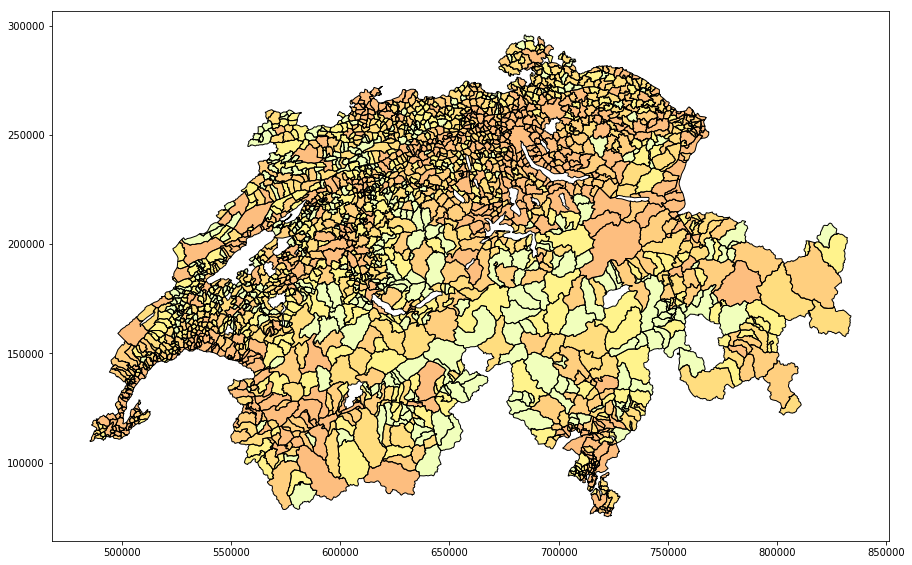

In [56]:
gdf_gem.plot(column='Total_Einbürgerungen', scheme='equal_intervals', cmap='Wistia', figsize=(15,10))

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equal_intervals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


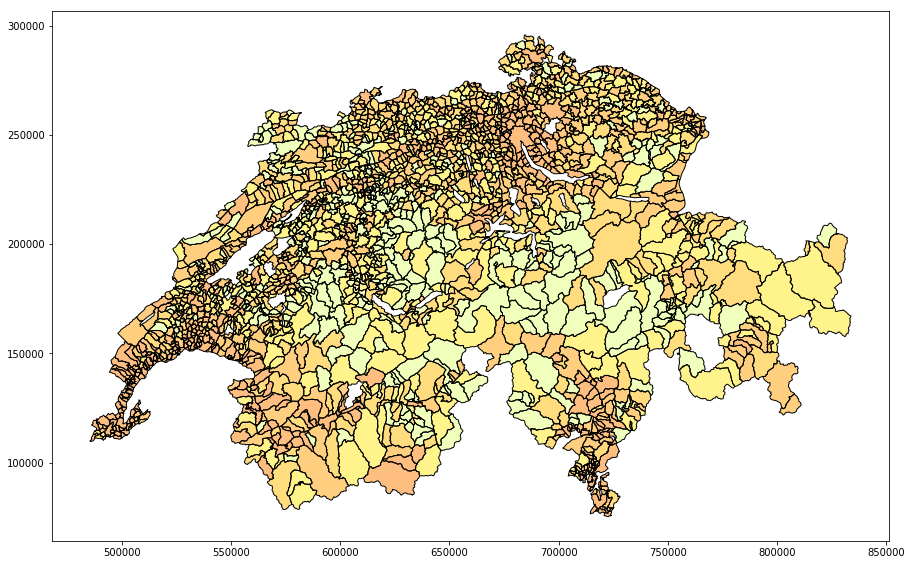

In [57]:
gdf_gem.plot(column='Einbürgerungsquote', scheme='equal_intervals', cmap='Wistia', figsize=(15,15))

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equal_intervals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


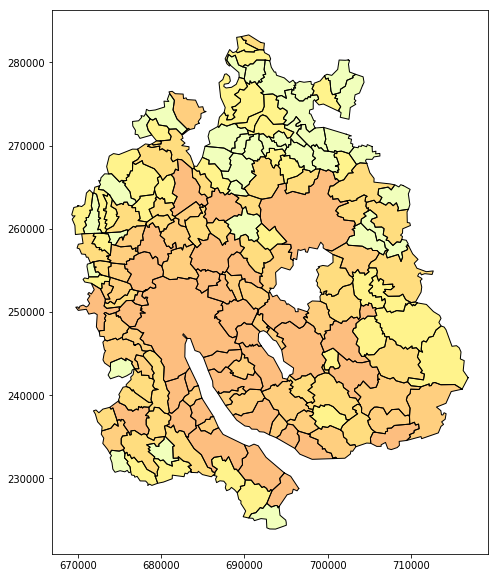

In [58]:
gdf_gem[gdf_gem['KTNR'] == 1].plot(column='Total_Einbürgerungen', scheme='equal_intervals', cmap='Wistia', figsize=(10,10))

/usr/local/lib/python3.6/site-packages/geopandas/geodataframe.py:447: UserWarning: Unrecognized scheme "equal_intervals". Using "Quantiles" instead
  return plot_dataframe(self, *args, **kwargs)


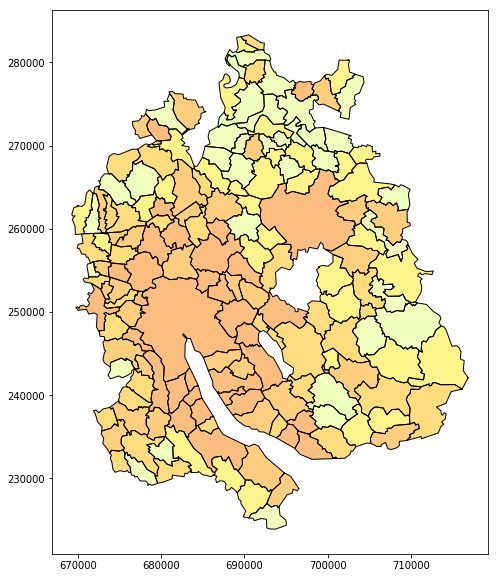

In [59]:
gdf_gem[gdf_gem['KTNR'] == 1].plot(column='Einbürgerungsquote', scheme='equal_intervals', cmap='Wistia', figsize=(10,10))

# Some rankings

In [62]:
df_gem3.head(2)

,GMDNR,2011,2012,2013,2014,2015,Total_Einbürgerungen,Gemeindename,Bevölkerungsstand 1. Jan,Einbürgerungsquote
0,1,15,6,11,8,10,50,Aeugst am Albis,1959.0,2.552323
1,2,49,55,83,49,55,291,Affoltern am Albis,11552.0,2.519044


In [66]:
df_gem3.sort_values('Total_Einbürgerungen', ascending=False).head(20)['Total_Einbürgerungen'].plot(kind='barh', title='Anzahl Einbürgerungen 2010-15', figsize=(10,10)))
#['Total_Einbürgerungen'].plot(kind='barh, y='GMDNAME', title='Anzahl Einbürgerungen 2010-15', figsize=(10,10))

SyntaxError: invalid syntax (<ipython-input-66-5ddc60345cce>, line 1)